FactorAnalysis is a simple factor test project, you just need to input two df, where df_ret is the stock daily return and df_factor stores those factor numbers for each stock at each time we have calculated out already, and noticing that both have to be perfectly matched together. Index stands for the time and columns stand for the stock name. 

And please don't rush to run over all the code. Notebook can store the wrong outputs I made, so check these picutres below.

In [10]:
from FactorAnalysis import*

In [11]:
df_ret= pd.read_csv('daily_return.csv', index_col=0)
df_ret = df_ret.iloc[2:-1,:]
df_ret

000001.SZA  000002.SZA  000005.SZA  000006.SZA  000008.SZA  \
date                                                                    
2017/1/5     0.000000    0.004317   -0.002865    0.005128    0.001063   
2017/1/6    -0.004362   -0.016237    0.000000    0.010204    0.006369   
2017/1/9     0.002191    0.003398    0.015805    0.002020    0.006329   
2017/1/10   -0.001093   -0.007257   -0.008487    0.001008   -0.007338   
2017/1/11   -0.001094   -0.005848   -0.027104   -0.034240   -0.011616   
...               ...         ...         ...         ...         ...   
2022/1/26   -0.026549   -0.021915    0.039024    0.004640    0.000000   
2022/1/27   -0.006667    0.003410   -0.028169   -0.016166   -0.015625   
2022/1/28   -0.022575   -0.003398    0.038647    0.016432   -0.027778   
2022/2/7     0.017478    0.013639    0.013954    0.011547    0.032653   
2022/2/8     0.038037    0.000481    0.018349    0.045662    0.043478   

           000009.SZA  000011.SZA  000012.SZA  000016.SZA  000019.SZA  ...  \
date                                                                   ...   
2017/1/5    -0.011268    0.001546    0.001730    0.002174    0.013317  ...   
2017/1/6    -0.007597    0.025219   -0.015544   -0.002169    0.010753  ...   
2017/1/9     0.006698    0.013052    0.004386    0.004348    0.012411  ...   
2017/1/10    0.007605   -0.048563    0.041921    0.002164   -0.022183  ...   
2017/1/11   -0.027358   -0.038542   -0.010897   -0.006479   -0.020298  ...   
...               ...         ...         ...         ...         ...  ...   
2022/1/26   -0.023512    0.013686    0.010216    0.020906    0.001479  ...   
2022/1/27   -0.022573   -0.022502    0.004494   -0.015358   -0.029542  ...   
2022/1/28    0.004619    0.008287    0.008949    0.027730    0.024353  ...   
2022/2/7     0.027586    0.011872   -0.006652    0.011804    0.008915  ...   
2022/2/8     0.000000    0.018953    0.018973    0.010000    0.007364  ...   

           688188.SHA  688200.SHA  688202.SHA  688208.SHA  688298.SHA  \
date                                                                    
2017/1/5          NaN         NaN         NaN         NaN         NaN   
2017/1/6          NaN         NaN         NaN         NaN         NaN   
2017/1/9          NaN         NaN         NaN         NaN         NaN   
2017/1/10         NaN         NaN         NaN         NaN         NaN   
2017/1/11         NaN         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2022/1/26   -0.028470   -0.020637   -0.009980   -0.012030   -0.006752   
2022/1/27   -0.050503   -0.013022   -0.037401    0.016895   -0.042423   
2022/1/28   -0.012530    0.006162   -0.002023   -0.052088   -0.002516   
2022/2/7    -0.028207   -0.023328   -0.054769   -0.078162   -0.004505   
2022/2/8    -0.010241   -0.028960   -0.016406   -0.017129   -0.020588   

           688363.SHA  688366.SHA  688368.SHA  688396.SHA  688399.SHA  
date                                                                   
2017/1/5          NaN         NaN         NaN         NaN         NaN  
2017/1/6          NaN         NaN         NaN         NaN         NaN  
2017/1/9          NaN         NaN         NaN         NaN         NaN  
2017/1/10         NaN         NaN         NaN         NaN         NaN  
2017/1/11         NaN         NaN         NaN         NaN         NaN  
...               ...         ...         ...         ...         ...  
2022/1/26   -0.006441    0.009665    0.020790    0.001569   -0.027611  
2022/1/27   -0.031605   -0.025211   -0.022907   -0.030973   -0.022060  
2022/1/28    0.020837   -0.022849   -0.015345   -0.001616   -0.002972  
2022/2/7    -0.016313   -0.005672    0.034589   -0.004317   -0.037683  
2022/2/8     0.009333    0.016511   -0.037617    0.005239    0.010326  

[1236 rows x 2227 columns]

In the raw df by reading those csv, df_ret is fine but df_factor needs to be shifted one step forward, because it means that we use the factor calculated yesterday to direct our buying or selling today.

In [12]:
df_factor = pd.read_csv('over_night.csv', index_col=0)
df_factor = df_factor.shift(1).iloc[2:-1,:]
df_factor

000001.SZA  000002.SZA  000005.SZA  000006.SZA  000008.SZA  \
date                                                                    
2017/1/5    -0.001092    0.000482    0.000000    0.001034    0.001071   
2017/1/6     0.001092    0.000000   -0.004279   -0.005102    0.002130   
2017/1/9     0.000000    0.000478   -0.001435   -0.002037    0.001063   
2017/1/10    0.000000   -0.001938   -0.009957   -0.010989    0.000000   
2017/1/11    0.000000    0.000484    0.000000   -0.003015    0.001049   
...               ...         ...         ...         ...         ...   
2022/1/26   -0.006977   -0.004608   -0.004717    0.002242   -0.007491   
2022/1/27    0.005935    0.008165    0.000000    0.004662    0.015873   
2022/1/28   -0.009009   -0.009648    0.033980    0.000000   -0.011583   
2022/2/7     0.005522    0.007828   -0.004808    0.004717    0.000000   
2022/2/8     0.012002    0.009838    0.004673    0.009324   -0.039216   

           000009.SZA  000011.SZA  000012.SZA  000016.SZA  000019.SZA  ...  \
date                                                                   ...   
2017/1/5    -0.000956    0.000516    0.000877    0.000000    0.002448  ...   
2017/1/6     0.000000   -0.011717    0.001733    0.000000   -0.003619  ...   
2017/1/9    -0.000949    0.000000   -0.001724   -0.002165   -0.001789  ...   
2017/1/10   -0.005709   -0.016296    0.001757   -0.002169   -0.014560  ...   
2017/1/11   -0.004730   -0.009327    0.001750   -0.006452   -0.002330  ...   
...               ...         ...         ...         ...         ...  ...   
2022/1/26   -0.004878    0.000000    0.000000    0.003300    0.000000  ...   
2022/1/27    0.000735    0.004583   -0.001134   -0.008636   -0.001477  ...   
2022/1/28   -0.004494   -0.006261    0.000000    0.000000   -0.002945  ...   
2022/2/7     0.010895    0.005556    0.009029    0.001736    0.001524  ...   
2022/2/8     0.018735    0.001830    0.015766    0.017153    0.012030  ...   

           688188.SHA  688200.SHA  688202.SHA  688208.SHA  688298.SHA  \
date                                                                    
2017/1/5          NaN         NaN         NaN         NaN         NaN   
2017/1/6          NaN         NaN         NaN         NaN         NaN   
2017/1/9          NaN         NaN         NaN         NaN         NaN   
2017/1/10         NaN         NaN         NaN         NaN         NaN   
2017/1/11         NaN         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2022/1/26    0.000000    0.001516    0.002156   -0.001470    0.027285   
2022/1/27   -0.013856    0.009002    0.010320   -0.007463    0.029114   
2022/1/28    0.007018   -0.016456    0.000369   -0.005299    0.042476   
2022/2/7     0.000000   -0.009748   -0.003461    0.043906   -0.010361   
2022/2/8     0.020794    0.021467    0.025368    0.005238    0.009091   

           688363.SHA  688366.SHA  688368.SHA  688396.SHA  688399.SHA  
date                                                                   
2017/1/5          NaN         NaN         NaN         NaN         NaN  
2017/1/6          NaN         NaN         NaN         NaN         NaN  
2017/1/9          NaN         NaN         NaN         NaN         NaN  
2017/1/10         NaN         NaN         NaN         NaN         NaN  
2017/1/11         NaN         NaN         NaN         NaN         NaN  
...               ...         ...         ...         ...         ...  
2022/1/26   -0.002113    0.000184   -0.005373   -0.008444    0.004496  
2022/1/27    0.001855    0.001629   -0.007134    0.006843    0.022072  
2022/1/28    0.002926   -0.000758    0.000458    0.000000    0.007357  
2022/2/7    -0.002338    0.000000    0.006867    0.010341    0.004670  
2022/2/8     0.017431   -0.032910    0.015162    0.016639    0.019560  

[1236 rows x 2227 columns]

Right below this how FactorAnalysis shows its result, [1,5] stands for how often you want to change your stock portfolio, 1day or 5days and 10 stands for how many group you want to divide the orignial stock pool into and group 1 belongs to min10% factor stocks group, and group 10 for the largest 10% factor stocks. You can change this whatever you want!

===========================================================IC===========================================================

-----------------------------------------------------IC performance-----------------------------------------------------
             period_1: rank IC  period_5: rank IC
IC Mean                 0.0122             0.0171
IC IR                   0.1488             0.2380
IC Skew                -0.0758            -0.1068
IC Kurtosis             4.5498             1.0524
t: IC!=0                5.2311             3.7473
p: IC!=0                0.0000             0.0001

-------------------------------------------------------IC yearly--------------------------------------------------------


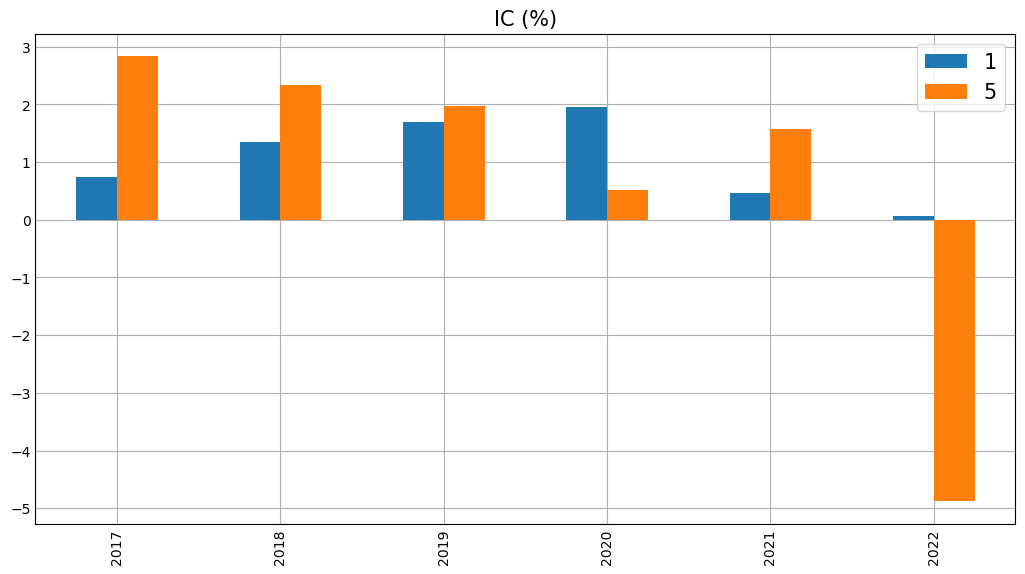


-------------------------------------------------------IC monthly-------------------------------------------------------


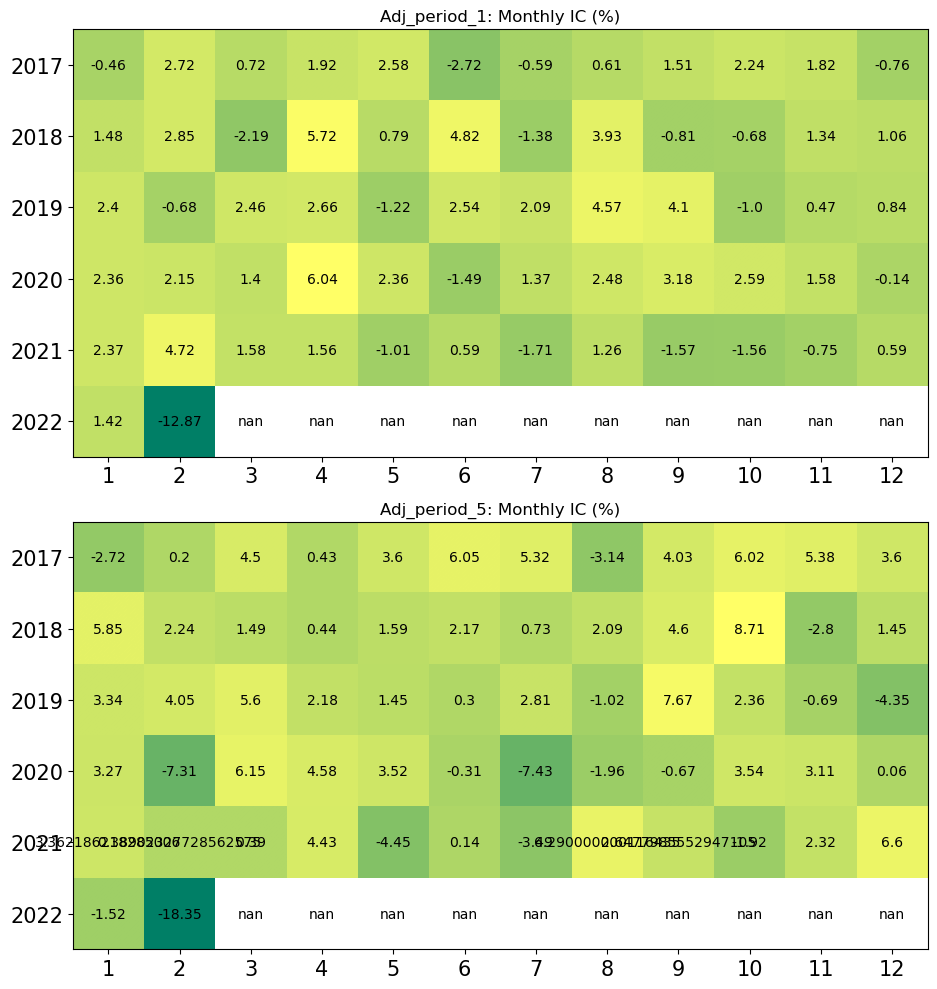


--------------------------------------------------------IC daily--------------------------------------------------------


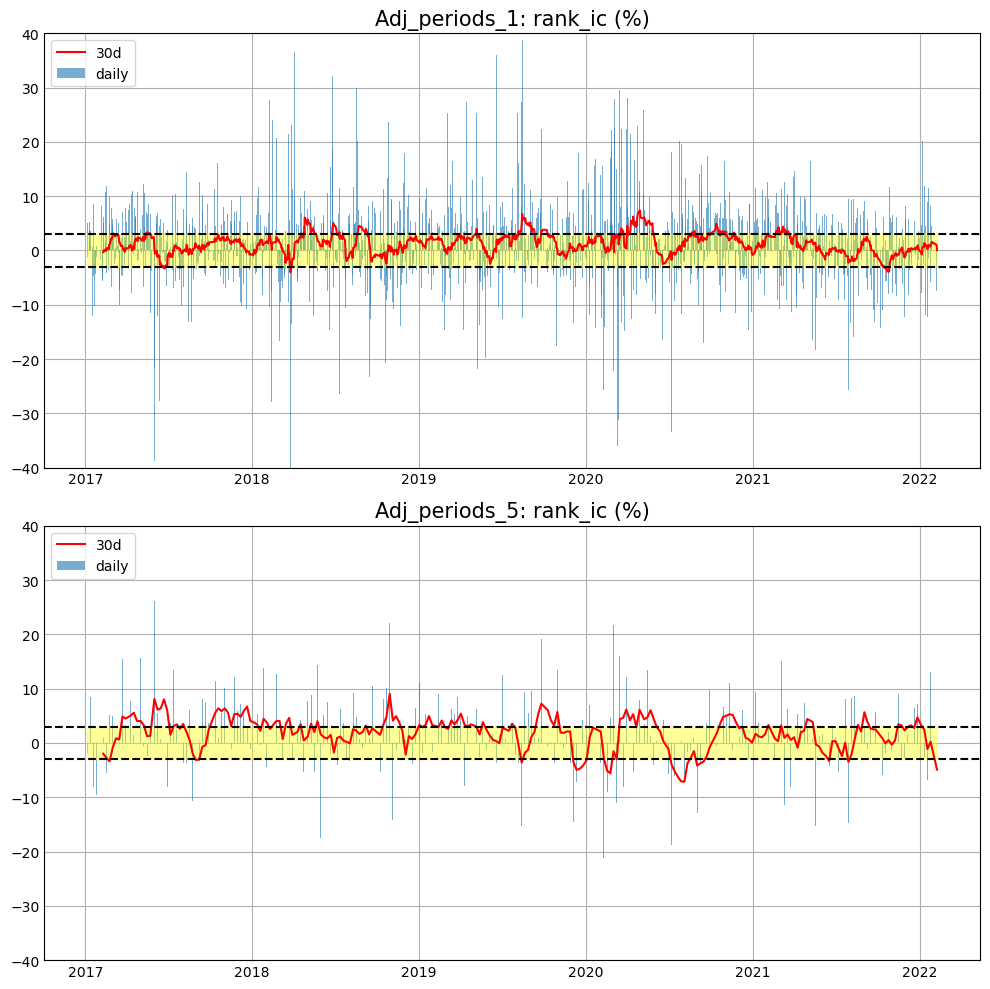


-----------------------------------------------------Cumulative IC------------------------------------------------------


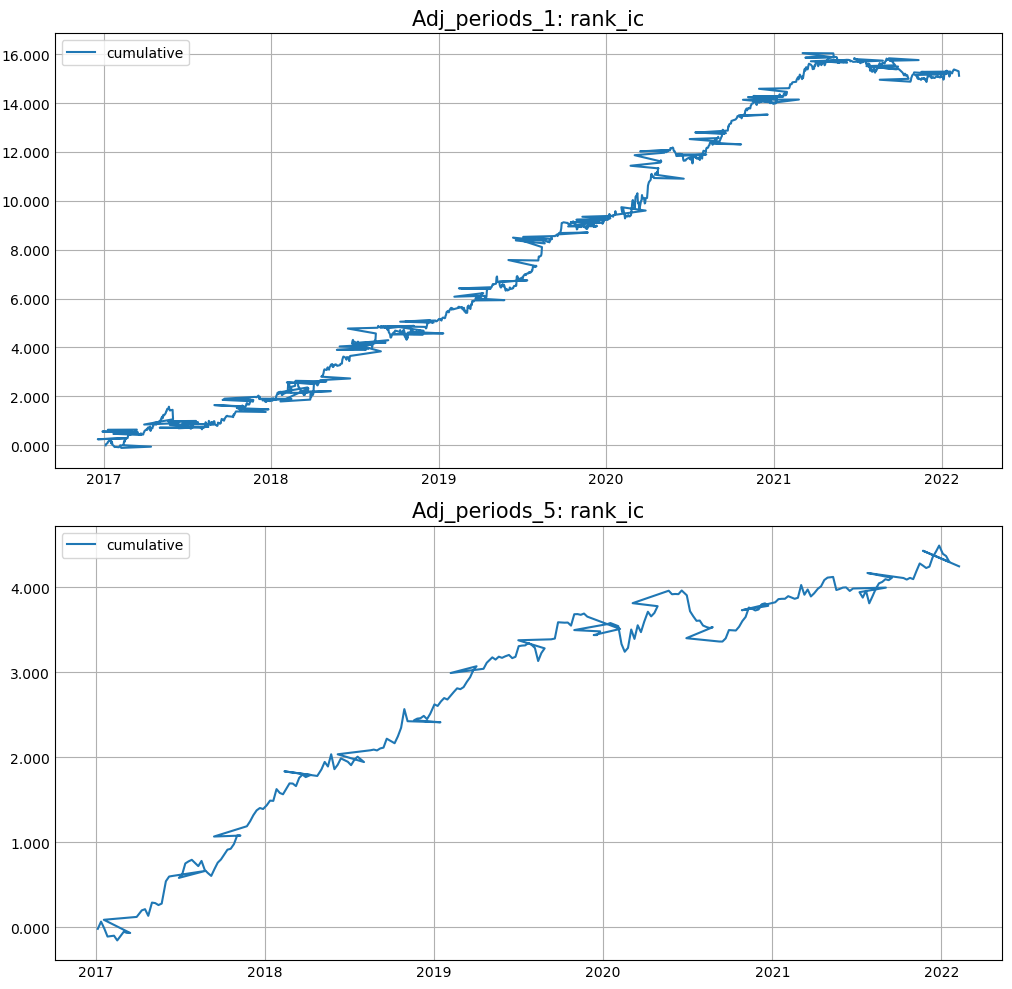

=========================================================Return=========================================================

-------------------------------------------------Long Short performance-------------------------------------------------
               period1   period5
AReturnRate   0.564546  0.343782
AVolatility   0.133143  0.108828
SharpeRatio   4.089940  2.975181
MaxDrawdown   0.084504  0.132575
WinningRatio  0.610841  0.693548
PnLRatio      1.196427  1.246727

---------------------------------------------------Long Short Return----------------------------------------------------


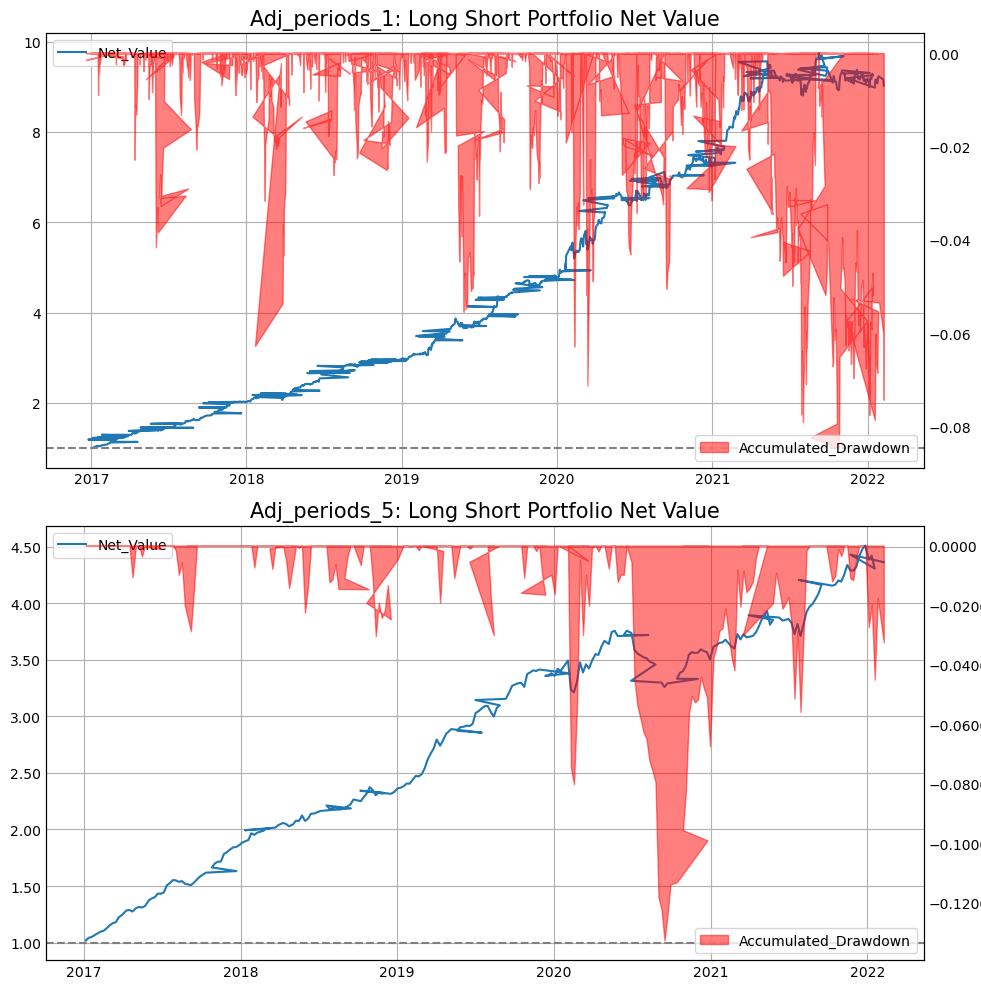


-----------------------------------------------Long Short Monthly Return------------------------------------------------


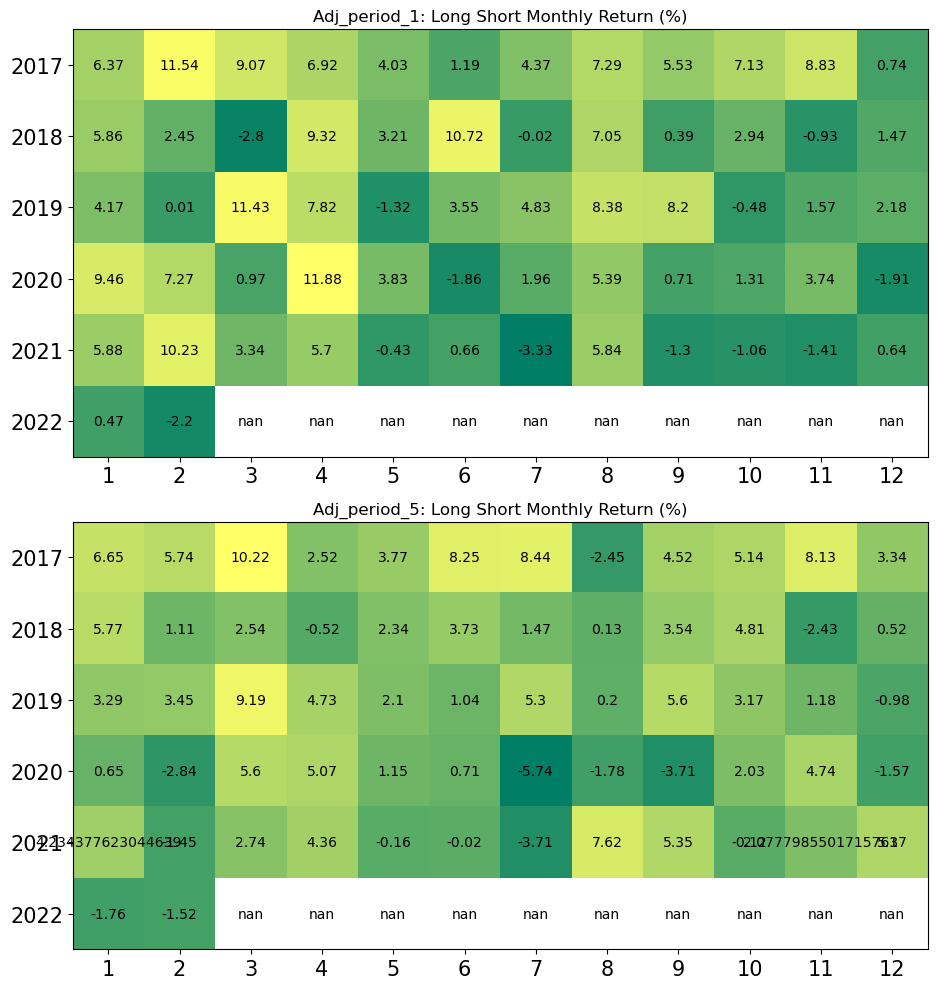


------------------------------------------------Long Short Daily Return-------------------------------------------------


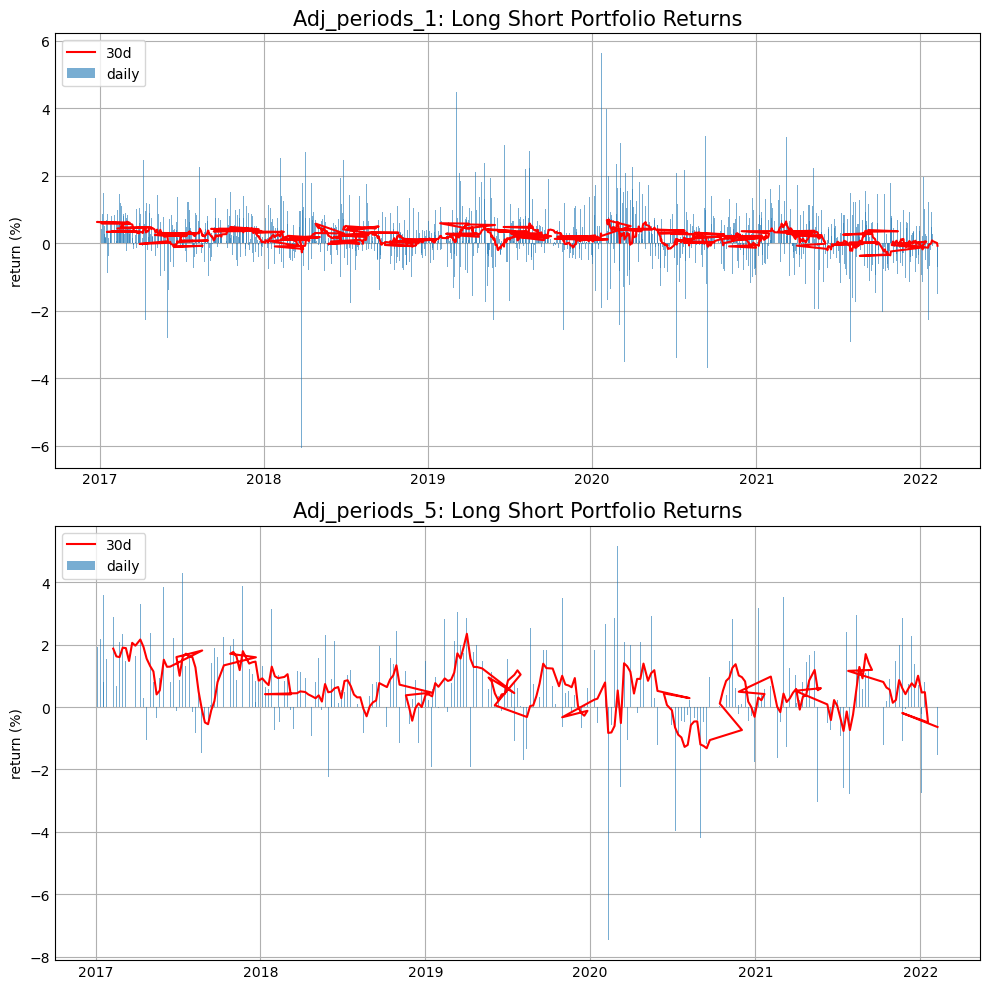


------------------------------------------------Long Returns Performance------------------------------------------------


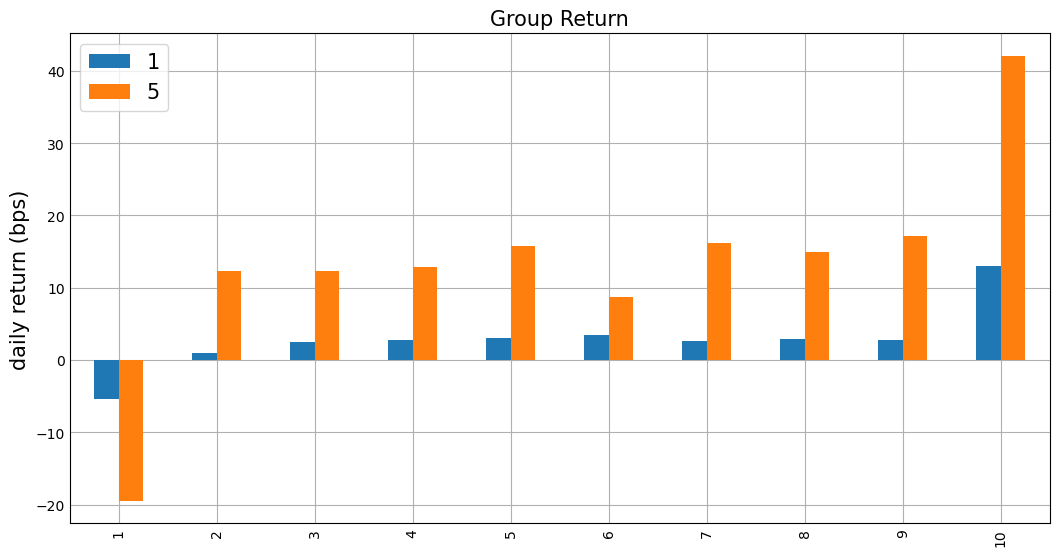

              period1 group1  period1 group10  period5 group1  period5 group10
AReturnRate        -0.127423         0.386978       -0.088964         0.237392
AVolatility         0.269020         0.243549        0.262514         0.246562
SharpeRatio        -0.548001         1.506797       -0.415080         0.881693
MaxDrawdown         0.583700         0.304369        0.536704         0.298333
WinningRatio        0.512945         0.568770        0.491935         0.552419
PnLRatio            0.891151         0.969086        0.942297         1.177729


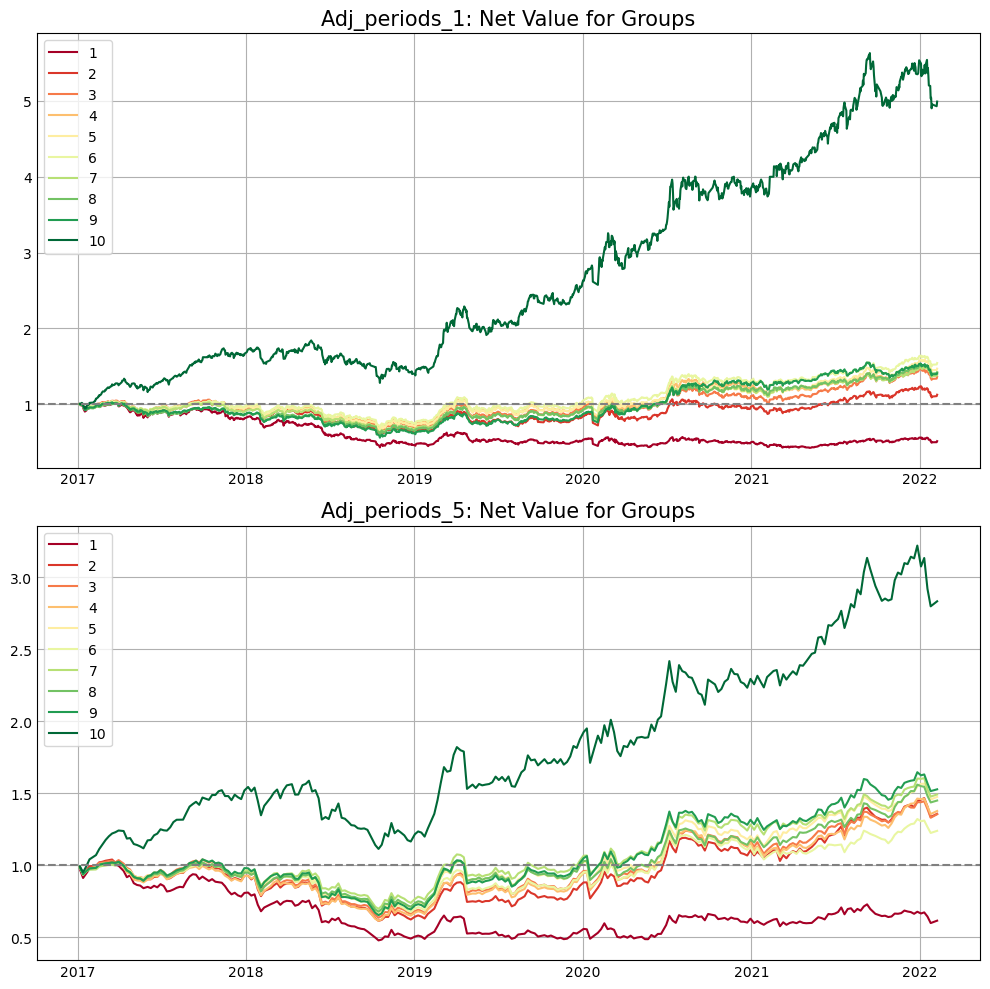


-----------------------------------------------Short Returns Performance------------------------------------------------


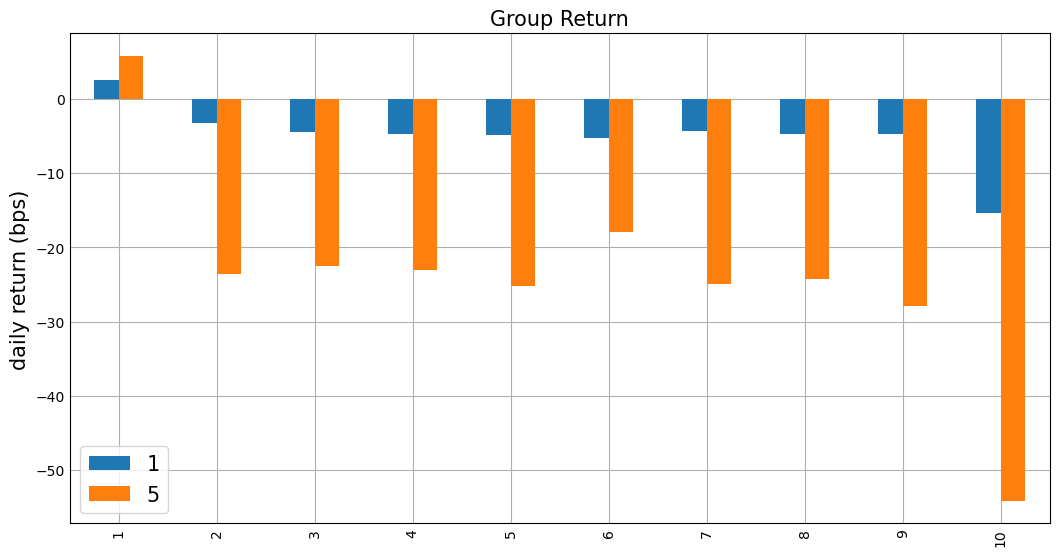

              period1 group1  period1 group10  period5 group1  period5 group10
AReturnRate         0.065908        -0.320896        0.024361        -0.240537
AVolatility         0.269020         0.243549        0.262514         0.246562
SharpeRatio         0.170648        -1.399702        0.016613        -1.056678
MaxDrawdown         0.401752         0.872526        0.478874         0.779868
WinningRatio        0.487055         0.431230        0.508065         0.447581
PnLRatio            1.122144         1.031900        1.061236         0.849091


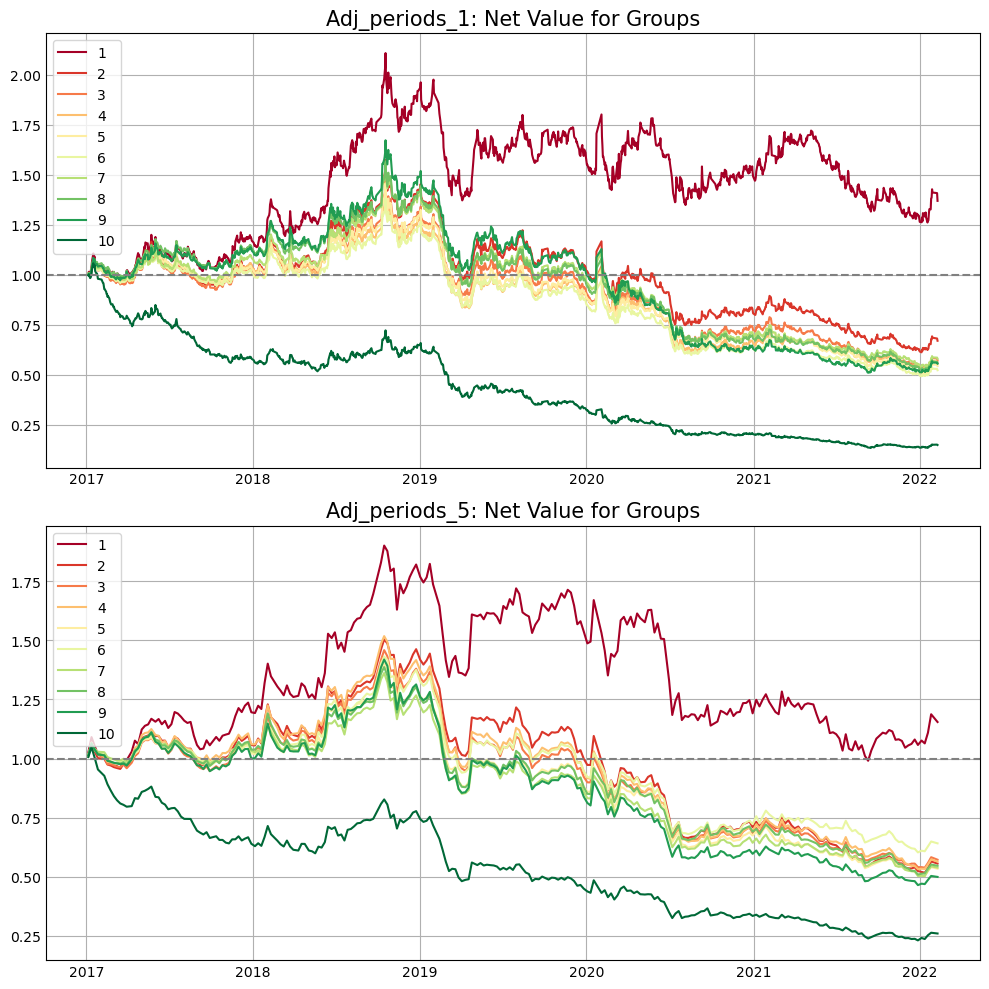


--------------------------------------------Excess Long Returns Performance---------------------------------------------


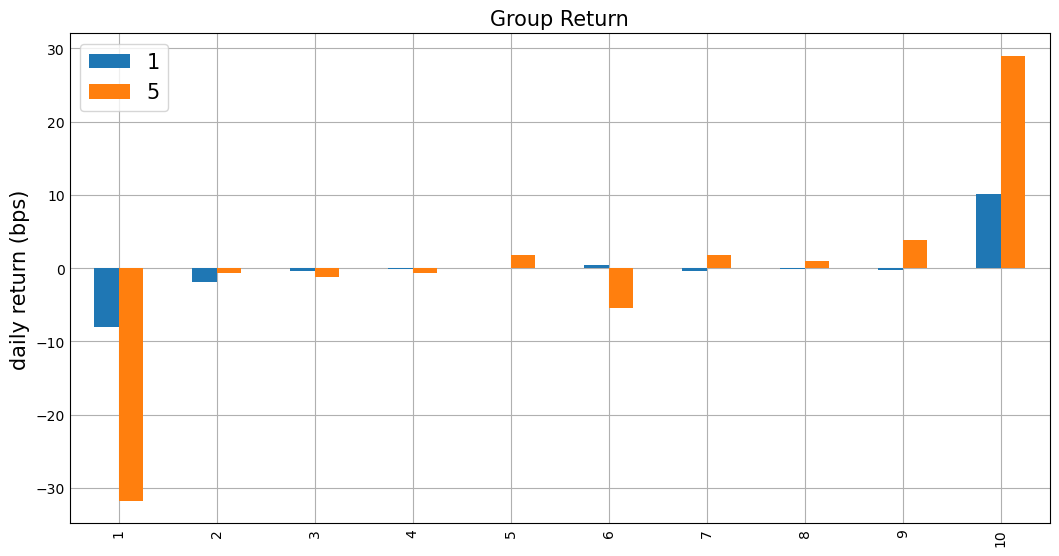

              period1 group1  period1 group10  period5 group1  period5 group10
AReturnRate        -0.183402         0.288920       -0.146301         0.155466
AVolatility         0.091345         0.095702        0.079870         0.075124
SharpeRatio        -2.226741         2.809975       -2.082159         1.803236
MaxDrawdown         0.643684         0.087955        0.550354         0.107122
WinningRatio        0.436084         0.620550        0.366935         0.625000
PnLRatio            0.885417         1.008265        0.822461         1.272474


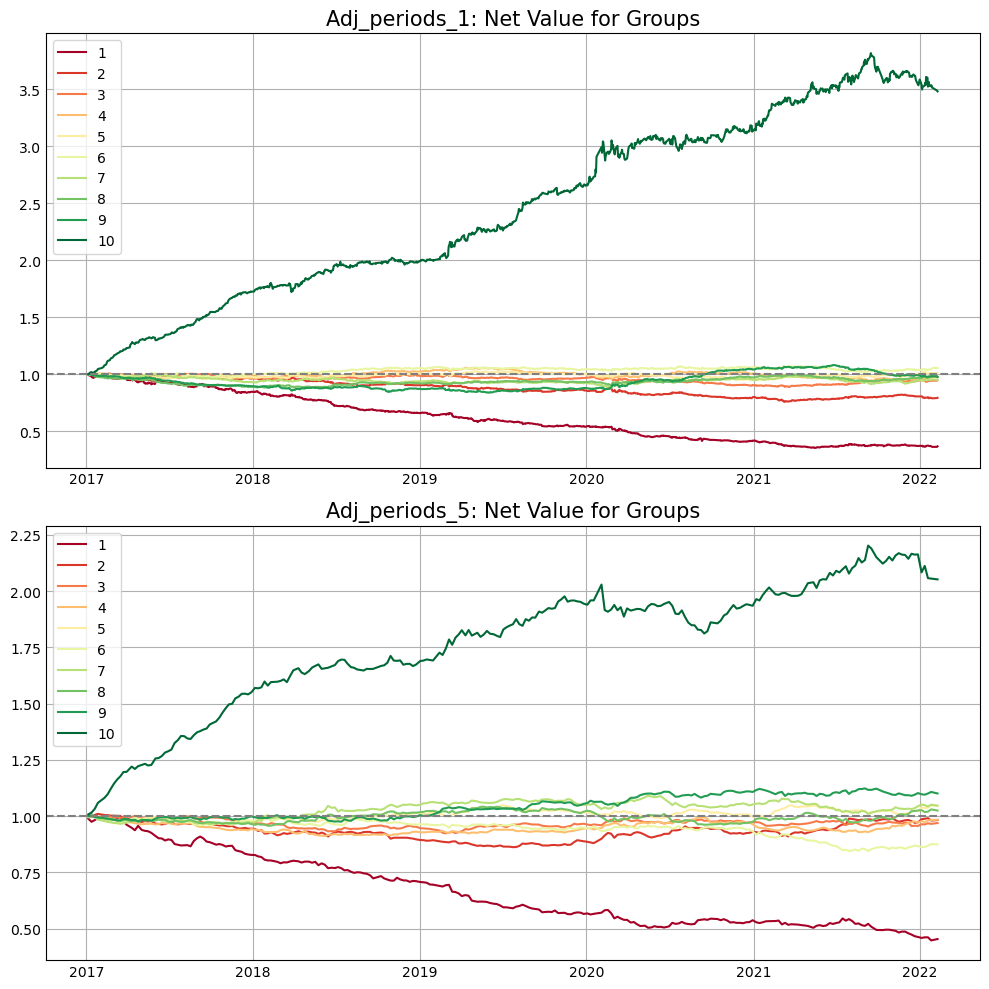


--------------------------------------------Excess Short Returns Performance--------------------------------------------


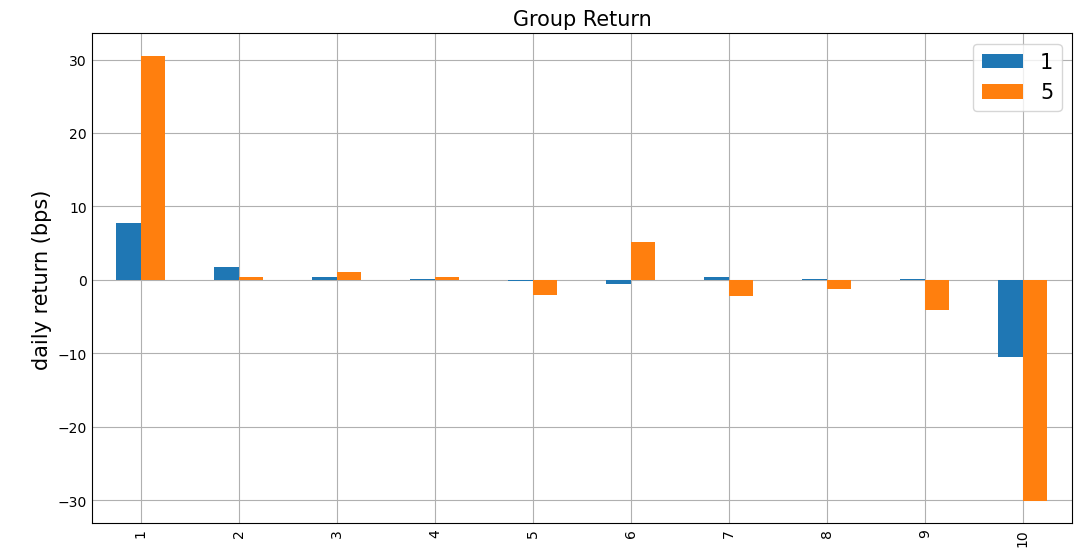

              period1 group1  period1 group10  period5 group1  period5 group10
AReturnRate         0.214227        -0.231435        0.163384        -0.139789
AVolatility         0.091345         0.095702        0.079870         0.075124
SharpeRatio         2.126294        -2.627272        1.795233        -2.127020
MaxDrawdown         0.089561         0.748224        0.083155         0.554430
WinningRatio        0.563916         0.379450        0.633065         0.375000
PnLRatio            1.129412         0.991802        1.215863         0.785871


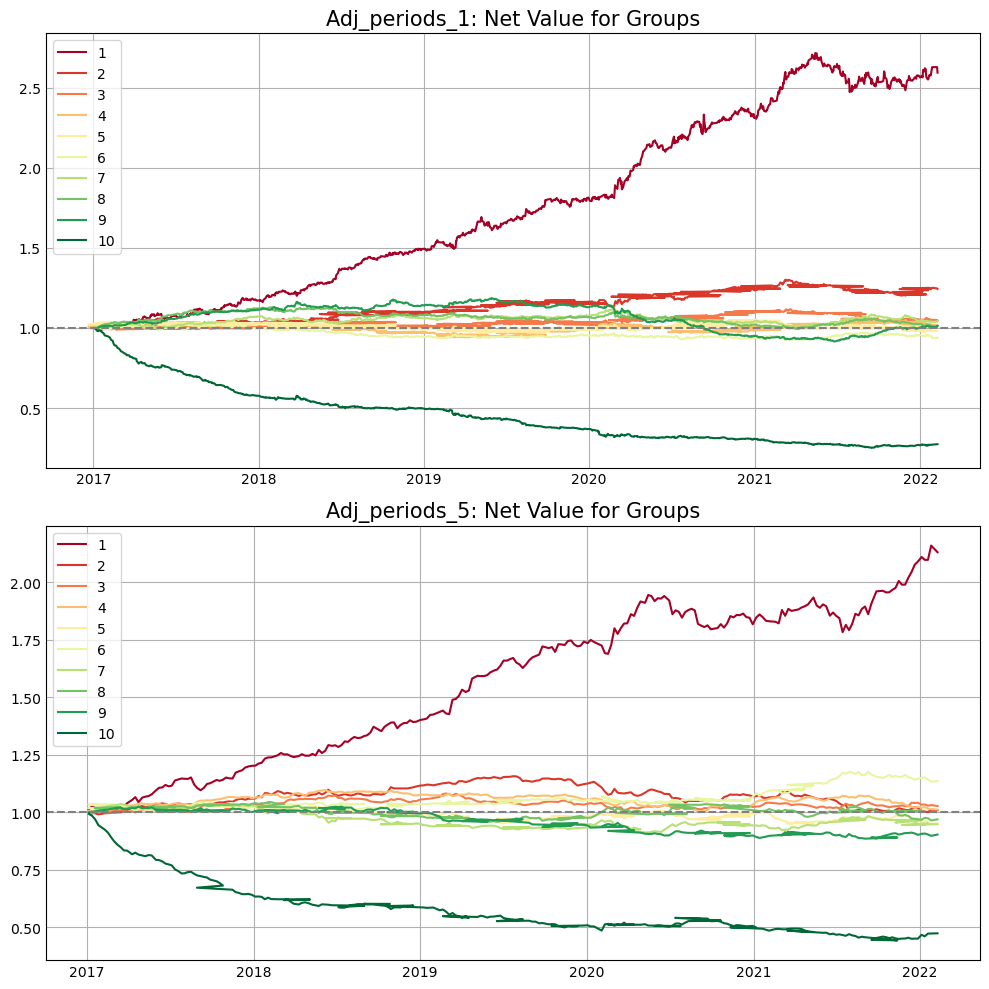

In [13]:
# factor = over_night open/pre_close-1
df_ret= pd.read_csv('daily_return.csv', index_col=0)
df_ret = df_ret.iloc[2:-1,:]
df_factor = pd.read_csv('over_night.csv', index_col=0)
df_factor = df_factor.shift(1).iloc[2:-1,:]
df_ret.index = pd.to_datetime(df_ret.index)
df_factor.index = pd.to_datetime(df_factor.index)

fa = FactorAnalysis(df_factor, df_ret, [1,5], 10)
fa.fast_analysis()

Now if you have gone through these wrong pictures already, you can run over these cells above and see what result you can get, yours should be with no problem.Cause I believe there is no big mistake in our py code.
